In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('reviews.csv', names=['Game_ID', 'Num_Helpful', 'Num_Funny', 'Username', 'Num_Games_Owned', 'Num_Reviews_Written', 'Recommend', 'Hours_Played', 'Date_of_Review', 'Review_Text'])

In [3]:
dataset.head()

,Game_ID,Num_Helpful,Num_Funny,Username,Num_Games_Owned,Num_Reviews_Written,Recommend,Hours_Played,Date_of_Review,Review_Text
0,240440,0,0,76561198061248215,247,1,1,7.7,"October 10, 2021",Really fun game with a nice atmosphere. I will...
1,240440,0,0,WARDSTRAND,164,22,1,4.7,"September 20, 2021","A sublime masterpiece, having much more substa..."
2,240440,0,0,carptool,518,34,1,4.1,"September 11, 2021",could not finish it because of a dismaying bug...
3,240440,0,0,76561199097308664,78,4,1,5.7,"September 5, 2021",Brendon Chung's unique narrative ability is ve...
4,240440,0,0,76561198031937741,322,38,1,12.2,"September 2, 2021",great game


In [4]:
dataset.columns

Index(['Game_ID', 'Num_Helpful', 'Num_Funny', 'Username', 'Num_Games_Owned',
       'Num_Reviews_Written', 'Recommend', 'Hours_Played', 'Date_of_Review',
       'Review_Text'],
      dtype='object')

In [5]:
# clean up uneeded columns
dataset.drop(labels = ['Game_ID', 'Username', 'Num_Games_Owned', 'Num_Reviews_Written'], axis=1, inplace=True)

In [6]:
dataset.head()

,Num_Helpful,Num_Funny,Recommend,Hours_Played,Date_of_Review,Review_Text
0,0,0,1,7.7,"October 10, 2021",Really fun game with a nice atmosphere. I will...
1,0,0,1,4.7,"September 20, 2021","A sublime masterpiece, having much more substa..."
2,0,0,1,4.1,"September 11, 2021",could not finish it because of a dismaying bug...
3,0,0,1,5.7,"September 5, 2021",Brendon Chung's unique narrative ability is ve...
4,0,0,1,12.2,"September 2, 2021",great game


In [7]:
print(dataset.dtypes)

Num_Helpful         int64
Num_Funny           int64
Recommend           int64
Hours_Played      float64
Date_of_Review     object
Review_Text        object
dtype: object


In [8]:
# organize the columns so it would be easier to sort the features vs the output
df = dataset[['Date_of_Review', 'Review_Text', 'Num_Helpful', 'Num_Funny', 'Hours_Played', 'Recommend']]
df.head(20)

,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend
0,"October 10, 2021",Really fun game with a nice atmosphere. I will...,0,0,7.7,1
1,"September 20, 2021","A sublime masterpiece, having much more substa...",0,0,4.7,1
2,"September 11, 2021",could not finish it because of a dismaying bug...,0,0,4.1,1
3,"September 5, 2021",Brendon Chung's unique narrative ability is ve...,0,0,5.7,1
4,"September 2, 2021",great game,0,0,12.2,1
5,"August 22, 2021",Can't believe I haven't already done a review ...,0,0,8.1,1
6,"August 6, 2021",What I like about this game is that is has a r...,1,0,14.0,1
7,"July 30, 2021",good game,1,0,3.5,1
8,"July 30, 2021",A nice short little puzzle game. Some of them ...,0,0,5.3,1
9,"July 29, 2021",Took me years to get around to playing this bu...,0,0,10.1,1


In [9]:
df.columns

Index(['Date_of_Review', 'Review_Text', 'Num_Helpful', 'Num_Funny',
       'Hours_Played', 'Recommend'],
      dtype='object')

# Convert date to datetime format

In [10]:
import datetime as dt

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date_of_Review  615 non-null    object 
 1   Review_Text     615 non-null    object 
 2   Num_Helpful     615 non-null    int64  
 3   Num_Funny       615 non-null    int64  
 4   Hours_Played    615 non-null    float64
 5   Recommend       615 non-null    int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 29.0+ KB


In [12]:
# change date to unix datetime
dates = pd.to_datetime(df['Date_of_Review'])

# calculate unix datetime starting from 01-01-1970
df['Date_Epoch'] = (dates - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')

df.head()

C:\Users\anqiz\AppData\Local\Temp/ipykernel_30236/3723366679.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date_Epoch'] = (dates - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')


,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch
0,"October 10, 2021",Really fun game with a nice atmosphere. I will...,0,0,7.7,1,1633824000
1,"September 20, 2021","A sublime masterpiece, having much more substa...",0,0,4.7,1,1632096000
2,"September 11, 2021",could not finish it because of a dismaying bug...,0,0,4.1,1,1631318400
3,"September 5, 2021",Brendon Chung's unique narrative ability is ve...,0,0,5.7,1,1630800000
4,"September 2, 2021",great game,0,0,12.2,1,1630540800


In [13]:
# change the epoch time from total number of seconds into week number since(take the Date_Epoch and mod (b/c we want integers only) by num_secs_week = 7day/wk * 24hr/day * 60min/hr * 60sec/min = 604800)

df['Date_Epoch_Week'] = df['Date_Epoch'] // 604800

df.head()

C:\Users\anqiz\AppData\Local\Temp/ipykernel_30236/3335926905.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date_Epoch_Week'] = df['Date_Epoch'] // 604800


,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch,Date_Epoch_Week
0,"October 10, 2021",Really fun game with a nice atmosphere. I will...,0,0,7.7,1,1633824000,2701
1,"September 20, 2021","A sublime masterpiece, having much more substa...",0,0,4.7,1,1632096000,2698
2,"September 11, 2021",could not finish it because of a dismaying bug...,0,0,4.1,1,1631318400,2697
3,"September 5, 2021",Brendon Chung's unique narrative ability is ve...,0,0,5.7,1,1630800000,2696
4,"September 2, 2021",great game,0,0,12.2,1,1630540800,2696


In [14]:
df.sort_values(by=['Date_Epoch_Week'],ascending=True).groupby('Date_Epoch_Week')
df.head()

,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch,Date_Epoch_Week
0,"October 10, 2021",Really fun game with a nice atmosphere. I will...,0,0,7.7,1,1633824000,2701
1,"September 20, 2021","A sublime masterpiece, having much more substa...",0,0,4.7,1,1632096000,2698
2,"September 11, 2021",could not finish it because of a dismaying bug...,0,0,4.1,1,1631318400,2697
3,"September 5, 2021",Brendon Chung's unique narrative ability is ve...,0,0,5.7,1,1630800000,2696
4,"September 2, 2021",great game,0,0,12.2,1,1630540800,2696


## - Data Aggregation -

### Number of text reviews per day:

In [15]:
# reindex gets the columns needed
df_text = df.reindex(['Date_Epoch_Week','Date_of_Review', 'Review_Text'], axis=1)
df_text.head()
# formats to year-month datetime format
# df_text['Year_Month'] = pd.to_datetime(df_text['Year_Month'], format="%Y/%m")

,Date_Epoch_Week,Date_of_Review,Review_Text
0,2701,"October 10, 2021",Really fun game with a nice atmosphere. I will...
1,2698,"September 20, 2021","A sublime masterpiece, having much more substa..."
2,2697,"September 11, 2021",could not finish it because of a dismaying bug...
3,2696,"September 5, 2021",Brendon Chung's unique narrative ability is ve...
4,2696,"September 2, 2021",great game


In [16]:

# groupby counts the total number of reviews per day
text_days = df_text.groupby(['Date_Epoch_Week', 'Date_of_Review']).size().reset_index().rename(columns={0: 'review_count'})
text_days

,Date_Epoch_Week,Date_of_Review,review_count
0,2429,"July 25, 2016",22
1,2429,"July 26, 2016",22
2,2429,"July 27, 2016",14
3,2430,"August 1, 2016",10
4,2430,"August 2, 2016",2
...,...,...,...
346,2696,"September 2, 2021",1
347,2696,"September 5, 2021",1
348,2697,"September 11, 2021",1
349,2698,"September 20, 2021",1


<AxesSubplot:>

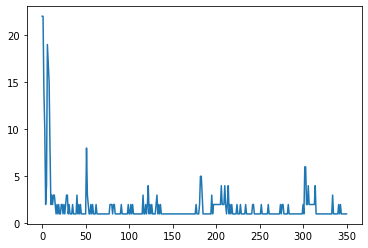

In [17]:
text_days['review_count'].plot()

In [18]:
# total number of text reviews
text_days['review_count'].sum()

615

In [19]:
# average number of text reviews per day
text_days['review_count'].mean()

1.7521367521367521

### Number of text reviews per week:

In [20]:
df_text = df.reindex(['Date_Epoch_Week','Review_Text'], axis=1)
text_weeks = df_text.groupby('Date_Epoch_Week').size().reset_index().rename(columns={0: 'review_count'})
text_weeks

,Date_Epoch_Week,review_count
0,2429,58
1,2430,75
2,2431,16
3,2432,9
4,2433,8
...,...,...
177,2694,1
178,2696,2
179,2697,1
180,2698,1


<AxesSubplot:>

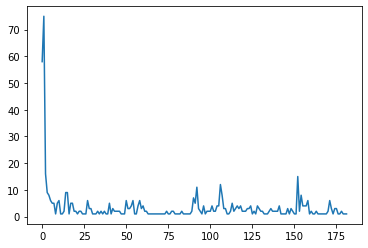

In [21]:
text_weeks['review_count'].plot()

In [22]:
# total number of text reviews
text_weeks['review_count'].sum()

615

In [23]:
# average number of text reviews per week
text_weeks['review_count'].mean()

3.379120879120879

### Num_Helpful per week:

In [24]:
df.head()

,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch,Date_Epoch_Week
0,"October 10, 2021",Really fun game with a nice atmosphere. I will...,0,0,7.7,1,1633824000,2701
1,"September 20, 2021","A sublime masterpiece, having much more substa...",0,0,4.7,1,1632096000,2698
2,"September 11, 2021",could not finish it because of a dismaying bug...,0,0,4.1,1,1631318400,2697
3,"September 5, 2021",Brendon Chung's unique narrative ability is ve...,0,0,5.7,1,1630800000,2696
4,"September 2, 2021",great game,0,0,12.2,1,1630540800,2696


In [25]:
df_helpful = df.reindex(['Date_Epoch_Week', 'Num_Helpful'], axis=1)
# total num of helpful votes per month (but keep in mind that helpful votes are for 1 review at a time)
df_helpful.groupby('Date_Epoch_Week').Num_Helpful.sum().reset_index().rename(columns={0: 'helpful_count'})


,Date_Epoch_Week,Num_Helpful
0,2429,847
1,2430,183
2,2431,23
3,2432,33
4,2433,4
...,...,...
177,2694,0
178,2696,0
179,2697,0
180,2698,0


In [26]:
df_helpful.groupby('Date_Epoch_Week').Num_Helpful.agg(['max', 'min', 'median', 'mean'])

,max,min,median,mean
Date_Epoch_Week,,,,
2429,408,0,2.0,14.603448
2430,57,0,0.0,2.440000
2431,17,0,0.0,1.437500
2432,9,0,3.0,3.666667
2433,3,0,0.0,0.500000
...,...,...,...,...
2694,0,0,0.0,0.000000
2696,0,0,0.0,0.000000
2697,0,0,0.0,0.000000


In [27]:
# total number of helpful votes of all users for all text reviews combined
df_helpful['Num_Helpful'].sum()

1892

In [28]:
# average number of helpful votes on all reviews by all users
df_helpful['Num_Helpful'].mean()

3.0764227642276425

### Num_Funny per week:

In [29]:
df_funny = df.reindex(['Date_Epoch_Week', 'Num_Funny'], axis=1)
# total num of helpful votes per month (but keep in mind that helpful votes are for 1 review at a time)
df_funny.groupby('Date_Epoch_Week').Num_Funny.sum().reset_index().rename(columns={0: 'funny_count'})

,Date_Epoch_Week,Num_Funny
0,2429,106
1,2430,41
2,2431,0
3,2432,2
4,2433,0
...,...,...
177,2694,0
178,2696,0
179,2697,0
180,2698,0


In [30]:
df_funny.groupby('Date_Epoch_Week').Num_Funny.agg(['max', 'min', 'median', 'mean'])

,max,min,median,mean
Date_Epoch_Week,,,,
2429,36,0,0.0,1.827586
2430,36,0,0.0,0.546667
2431,0,0,0.0,0.000000
2432,2,0,0.0,0.222222
2433,0,0,0.0,0.000000
...,...,...,...,...
2694,0,0,0.0,0.000000
2696,0,0,0.0,0.000000
2697,0,0,0.0,0.000000


In [31]:
# total number of funny votes of all users for all text reviews combined
df_funny['Num_Funny'].sum()

205

In [32]:
# average number of funny votes on all reviews by all users
df_funny['Num_Funny'].mean()

0.3333333333333333

### Hours_Played per week:

In [33]:
df_hrs_plyd = df.reindex(['Date_Epoch_Week','Hours_Played'], axis=1)

# total num of hours played of the game for each month for all reviewers
df_hrs_plyd.groupby('Date_Epoch_Week').Hours_Played.sum().reset_index().rename(columns={0: 'hrs_pld_count'})

,Date_Epoch_Week,Hours_Played
0,2429,387.1
1,2430,602.2
2,2431,108.1
3,2432,71.9
4,2433,59.4
...,...,...
177,2694,8.1
178,2696,17.9
179,2697,4.1
180,2698,4.7


In [34]:
df_hrs_plyd.groupby('Date_Epoch_Week').Hours_Played.agg(['max','min','median','mean'])

,max,min,median,mean
Date_Epoch_Week,,,,
2429,24.1,0.3,5.60,6.674138
2430,53.5,0.6,5.90,8.029333
2431,13.9,1.2,6.65,6.756250
2432,18.6,3.7,7.10,7.988889
2433,16.4,4.0,7.05,7.425000
...,...,...,...,...
2694,8.1,8.1,8.10,8.100000
2696,12.2,5.7,8.95,8.950000
2697,4.1,4.1,4.10,4.100000


In [35]:
# total number of hours played of the game by all users
df_hrs_plyd['Hours_Played'].sum()

4958.4

In [36]:
# average number of hours played of the game by all users
df_hrs_plyd['Hours_Played'].mean()

8.062439024390228

### Recommend per week:

In [37]:
df_recmd = df.reindex(['Date_Epoch_Week','Recommend'], axis=1)

# avgerage number of reviewers recommended(1) + not recommended(-1) the game after writing the review for each week
df_recmd.groupby('Date_Epoch_Week',).Recommend.mean().reset_index().rename(columns={0: 'recmd_count'})

,Date_Epoch_Week,Recommend
0,2429,0.896552
1,2430,0.840000
2,2431,0.625000
3,2432,1.000000
4,2433,1.000000
...,...,...
177,2694,1.000000
178,2696,1.000000
179,2697,1.000000
180,2698,1.000000


In [38]:
df_recmd.groupby('Date_Epoch_Week').Recommend.agg(['max','min','median','mean'])

,max,min,median,mean
Date_Epoch_Week,,,,
2429,1,-1,1.0,0.896552
2430,1,-1,1.0,0.840000
2431,1,-1,1.0,0.625000
2432,1,1,1.0,1.000000
2433,1,1,1.0,1.000000
...,...,...,...,...
2694,1,1,1.0,1.000000
2696,1,1,1.0,1.000000
2697,1,1,1.0,1.000000


In [39]:
# total number of users who recommend the game
df_recmd['Recommend'].sum()

511

In [40]:
# average score of recommend/not recommend by all users
df_recmd['Recommend'].mean()

0.8308943089430895

## Feature Scaling - Min-Max Normalization

In [41]:
df_min_max_scaled = df.copy()

In [42]:
df_min_max_scaled.head()

,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch,Date_Epoch_Week
0,"October 10, 2021",Really fun game with a nice atmosphere. I will...,0,0,7.7,1,1633824000,2701
1,"September 20, 2021","A sublime masterpiece, having much more substa...",0,0,4.7,1,1632096000,2698
2,"September 11, 2021",could not finish it because of a dismaying bug...,0,0,4.1,1,1631318400,2697
3,"September 5, 2021",Brendon Chung's unique narrative ability is ve...,0,0,5.7,1,1630800000,2696
4,"September 2, 2021",great game,0,0,12.2,1,1630540800,2696


In [43]:
#df_min_max_scaled['Num_Helpful'] = (df_min_max_scaled['Num_Helpful'] - df_min_max_scaled['Num_Helpful'].min()) / (df_min_max_scaled['Num_Helpful'].max() - df_min_max_scaled['Num_Helpful'].min())
#df_min_max_scaled['Hours_Played'] = (df_min_max_scaled['Hours_Played'] - df_min_max_scaled['Hours_Played'].min()) / (df_min_max_scaled['Hours_Played'].max() - df_min_max_scaled['Hours_Played'].min()) 
df_min_max_scaled['Hours_Played'] = (df_min_max_scaled['Hours_Played'] - df_min_max_scaled['Hours_Played'].min()) / (df_min_max_scaled['Hours_Played'].max() - df_min_max_scaled['Hours_Played'].min()) 
df_min_max_scaled['Recommend'] = (df_min_max_scaled['Recommend'] - df_min_max_scaled['Recommend'].min()) / (df_min_max_scaled['Recommend'].max() - df_min_max_scaled['Recommend'].min()) 
df_min_max_scaled['Date_Epoch'] = (df_min_max_scaled['Date_Epoch'] - df_min_max_scaled['Date_Epoch'].min()) / (df_min_max_scaled['Date_Epoch'].max() - df_min_max_scaled['Date_Epoch'].min()) 
#df_min_max_scaled['Date_Epoch_Week'] = (df_min_max_scaled['Date_Epoch_Week'] - df_min_max_scaled['Date_Epoch_Week'].min()) / (df_min_max_scaled['Date_Epoch_Week'].max() - df_min_max_scaled['Date_Epoch_Week'].min()) 

display(df_min_max_scaled)

,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch,Date_Epoch_Week
0,"October 10, 2021",Really fun game with a nice atmosphere. I will...,0,0,0.107345,1.0,1.000000,2701
1,"September 20, 2021","A sublime masterpiece, having much more substa...",0,0,0.064972,1.0,0.989490,2698
2,"September 11, 2021",could not finish it because of a dismaying bug...,0,0,0.056497,1.0,0.984761,2697
3,"September 5, 2021",Brendon Chung's unique narrative ability is ve...,0,0,0.079096,1.0,0.981608,2696
4,"September 2, 2021",great game,0,0,0.170904,1.0,0.980032,2696
...,...,...,...,...,...,...,...,...
610,"April 20, 2019","Fun, if short (about 5 hours to go through.) T...",1,0,0.076271,1.0,0.524961,2572
611,"April 18, 2019","Awesome little puzzle game. Buy it now, especi...",1,0,0.333333,1.0,0.523910,2572
612,"April 1, 2019","10/10This game is great, from it's hacker'y ga...",0,0,0.074859,1.0,0.514976,2569
613,"February 6, 2019",I wouldn't exactly call myself a lover of puzz...,0,0,0.381356,1.0,0.486600,2561


In [44]:
df_sorted = df_min_max_scaled.sort_values(by='Date_Epoch', ascending=False)

In [45]:
pd.set_option('display.max_rows', None)

In [46]:
df_sorted = df_sorted.reset_index(drop=True)

In [47]:
# drop all n/a data
clean_df=df.drop(df[df['Review_Text'].isna()].index, inplace=True)
cat_df=df.drop(df[df['Recommend'].isna()].index, inplace=True)

C:\Users\anqiz\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [48]:
# delete Chinese characters in text reviews
df_sorted['Review_Text'] = df_sorted['Review_Text'].str.replace(r'[^\x00-\x7F]+', '')

C:\Users\anqiz\AppData\Local\Temp/ipykernel_30236/2491715762.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_sorted['Review_Text'] = df_sorted['Review_Text'].str.replace(r'[^\x00-\x7F]+', '')


In [49]:
df_sorted

,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch,Date_Epoch_Week
0,"October 10, 2021",Really fun game with a nice atmosphere. I will...,0,0,0.107345,1.0,1.000000,2701
1,"September 20, 2021","A sublime masterpiece, having much more substa...",0,0,0.064972,1.0,0.989490,2698
2,"September 11, 2021",could not finish it because of a dismaying bug...,0,0,0.056497,1.0,0.984761,2697
3,"September 5, 2021",Brendon Chung's unique narrative ability is ve...,0,0,0.079096,1.0,0.981608,2696
4,"September 2, 2021",great game,0,0,0.170904,1.0,0.980032,2696
5,"August 22, 2021",Can't believe I haven't already done a review ...,0,0,0.112994,1.0,0.974251,2694
6,"August 6, 2021",What I like about this game is that is has a r...,1,0,0.196328,1.0,0.965843,2692
7,"July 30, 2021",good game,1,0,0.048023,1.0,0.962165,2691
8,"July 30, 2021",A nice short little puzzle game. Some of them ...,0,0,0.073446,1.0,0.962165,2691
9,"July 29, 2021",Took me years to get around to playing this bu...,0,0,0.141243,1.0,0.961640,2691


In [50]:
# sorted review text
df_text_list = df_sorted.groupby('Date_Epoch_Week')['Review_Text'].apply(list) # save separately as json file

In [51]:
df_text_list

Date_Epoch_Week
2429    [I've been following this game for a long time...
2430    [clever little heist-em-up. loveley motif. giv...
2431    [The game has fun videos and pictures but it j...
2432    [Blendo took a giant step in the right directi...
2433    [absolutely delightful.review.write;, This is ...
2434    [This game is great - it introduces u to new i...
2435    [I can praise this game all I want, but ultima...
2436    [Use your electric magic box to become the wiz...
2437    [Cool concept, unbelievably and unfairly short...
2438    [Man oh man I love this game.  It is definitel...
2439    [DISCLAIMER: This is a first impressions revie...
2440                                          [Pure fun.]
2441    [It is a very entertaining puzzle game. While ...
2442    [Got it only just a couple hours ago, but alre...
2446    [Fantastic game with well designed puzzles lea...
2447    [Absolutely great puzzle game for combining el...
2448    [Gigantic waste of potential. The basic hackin..

In [52]:
# storing data in JSON format
df_text_list.to_json('quadcowboy_text.json', orient = 'split', compression = 'infer')

In [53]:
# reading the JSON file
game_text = pd.read_json('quadcowboy_text.json')
print(game_text)

            name  index                                               data
0    Review_Text   2429  [I've been following this game for a long time...
1    Review_Text   2430  [clever little heist-em-up. loveley motif. giv...
2    Review_Text   2431  [The game has fun videos and pictures but it j...
3    Review_Text   2432  [Blendo took a giant step in the right directi...
4    Review_Text   2433  [absolutely delightful.review.write;, This is ...
5    Review_Text   2434  [This game is great - it introduces u to new i...
6    Review_Text   2435  [I can praise this game all I want, but ultima...
7    Review_Text   2436  [Use your electric magic box to become the wiz...
8    Review_Text   2437  [Cool concept, unbelievably and unfairly short...
9    Review_Text   2438  [Man oh man I love this game.  It is definitel...
10   Review_Text   2439  [DISCLAIMER: This is a first impressions revie...
11   Review_Text   2440                                        [Pure fun.]
12   Review_Text   2441  

In [54]:
# mean of other columns; save as csv file
mean_per_week = df_sorted.groupby('Date_Epoch_Week')['Num_Helpful', 'Num_Funny', 'Hours_Played', 'Recommend'].mean() # for weekly
mean_per_week.to_csv('quadcowboy_mean_week.csv')

C:\Users\anqiz\AppData\Local\Temp/ipykernel_30236/1395655015.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mean_per_week = df_sorted.groupby('Date_Epoch_Week')['Num_Helpful', 'Num_Funny', 'Hours_Played', 'Recommend'].mean() # for weekly


In [55]:
mean_day = df_sorted.groupby('Date_Epoch')['Num_Helpful', 'Num_Funny', 'Hours_Played', 'Recommend'].mean() # for daily
mean_day.to_csv('quadcowboy_mean_day.csv')

C:\Users\anqiz\AppData\Local\Temp/ipykernel_30236/2803849551.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mean_day = df_sorted.groupby('Date_Epoch')['Num_Helpful', 'Num_Funny', 'Hours_Played', 'Recommend'].mean() # for daily


In [56]:
# storing data in CSV format
game_review = df_sorted.to_csv('quadcowboy_review.csv', columns=['Date_Epoch_Week', 'Review_Text'])